## <center> How to Using a Public API with Python | Automating Crypto Website API Pull Using Python</center>

### API: It basically acts as an intermediary between two different applications that want to talk to each other.
### An API typically has a client and a server and so the application or the person that is submitting the request that is the client and then the server is the application that is sending the response to that request.   

### Let's start 

### 1-  Open <a href="https://coinmarketcap.com/">CoinMarketCap website</a>
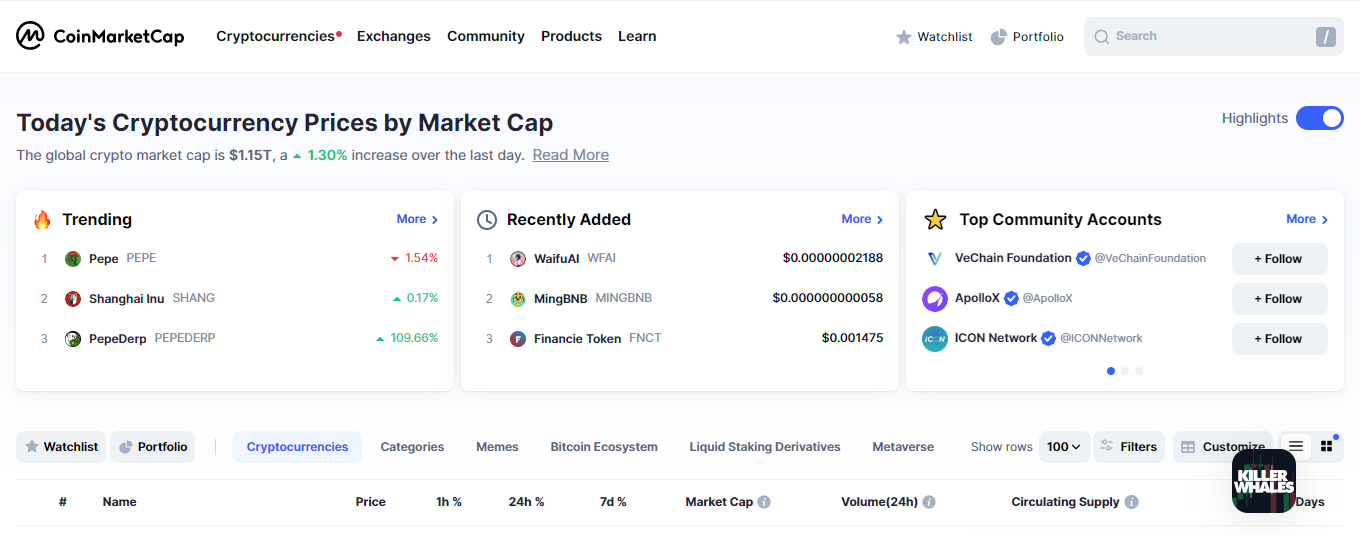 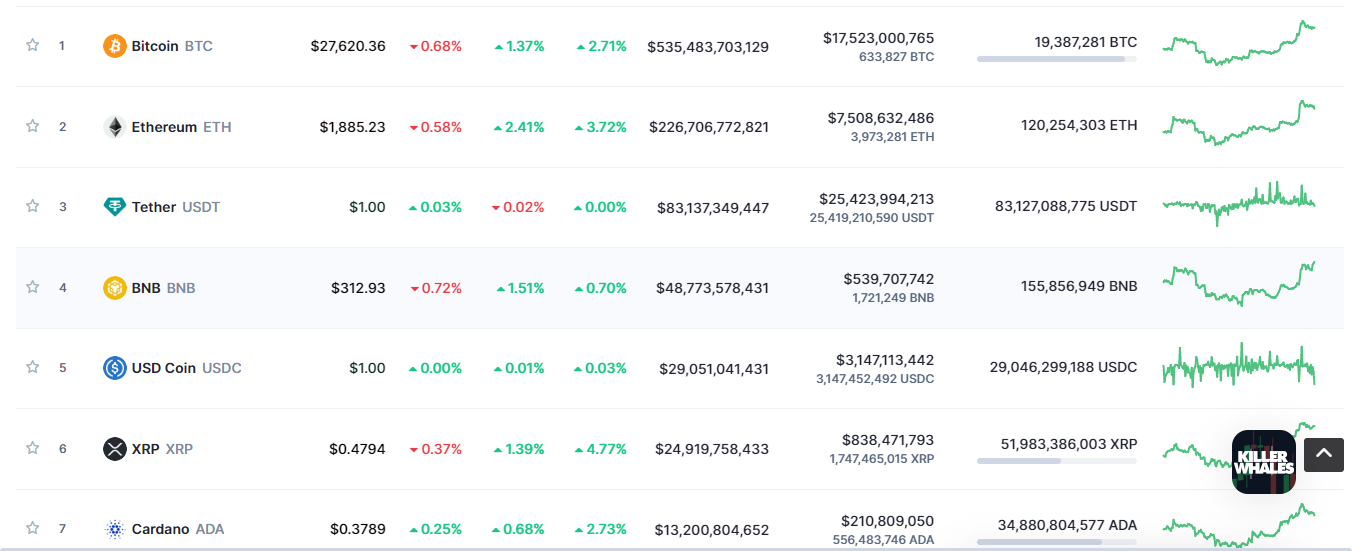

### 2- Go down to "products service" then to "Crypto API"
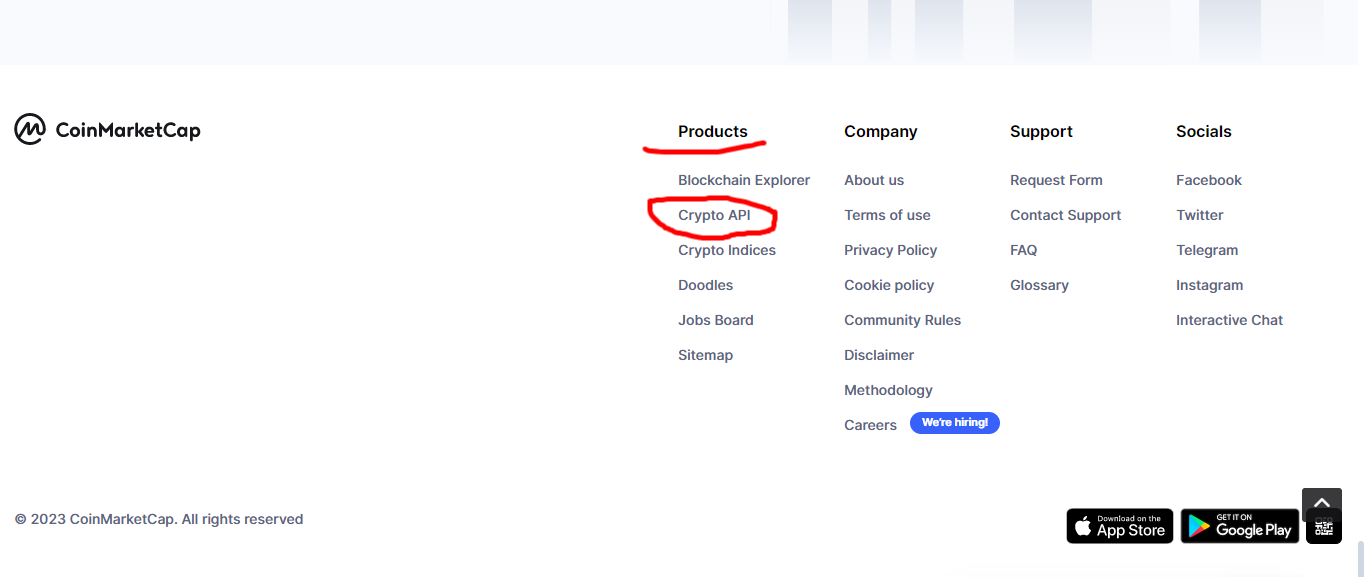

### Then  press on "get your API key now"

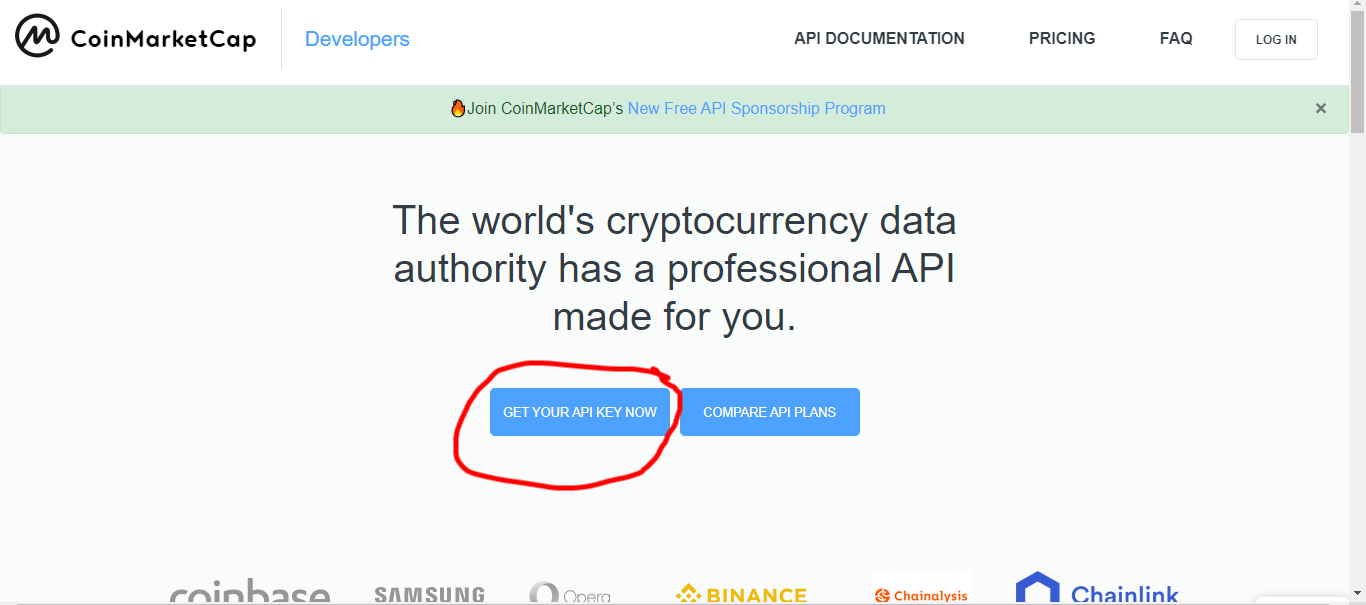

### 3- Create an account on CoinMarketCap website

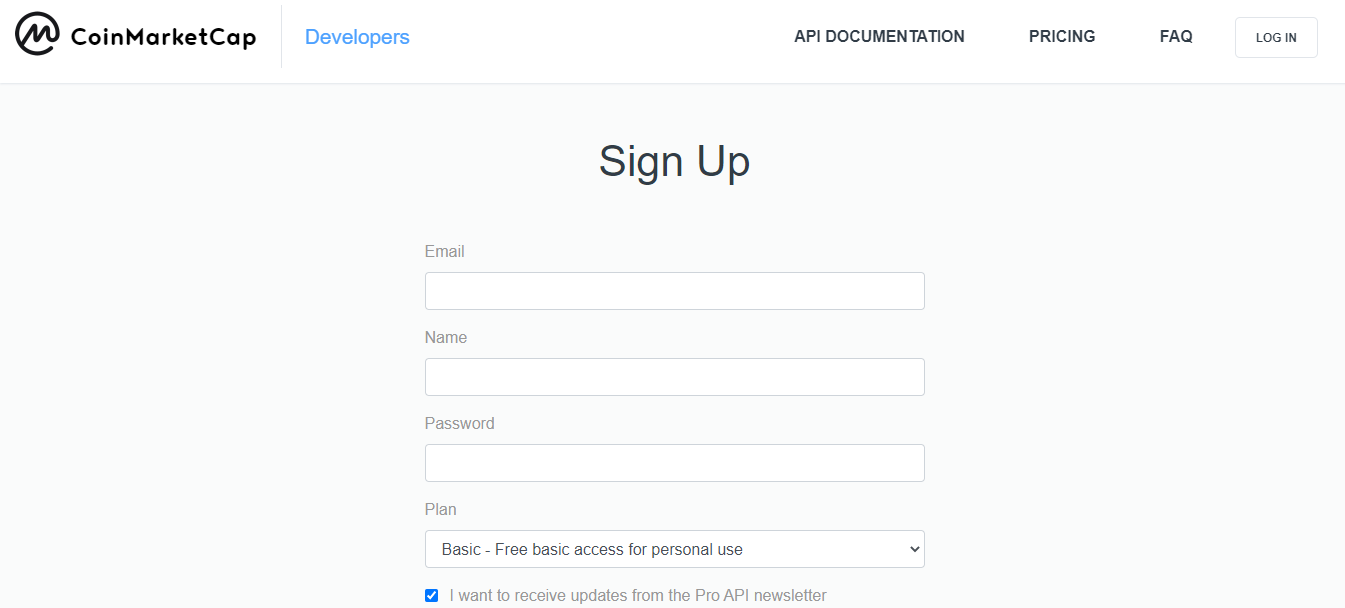

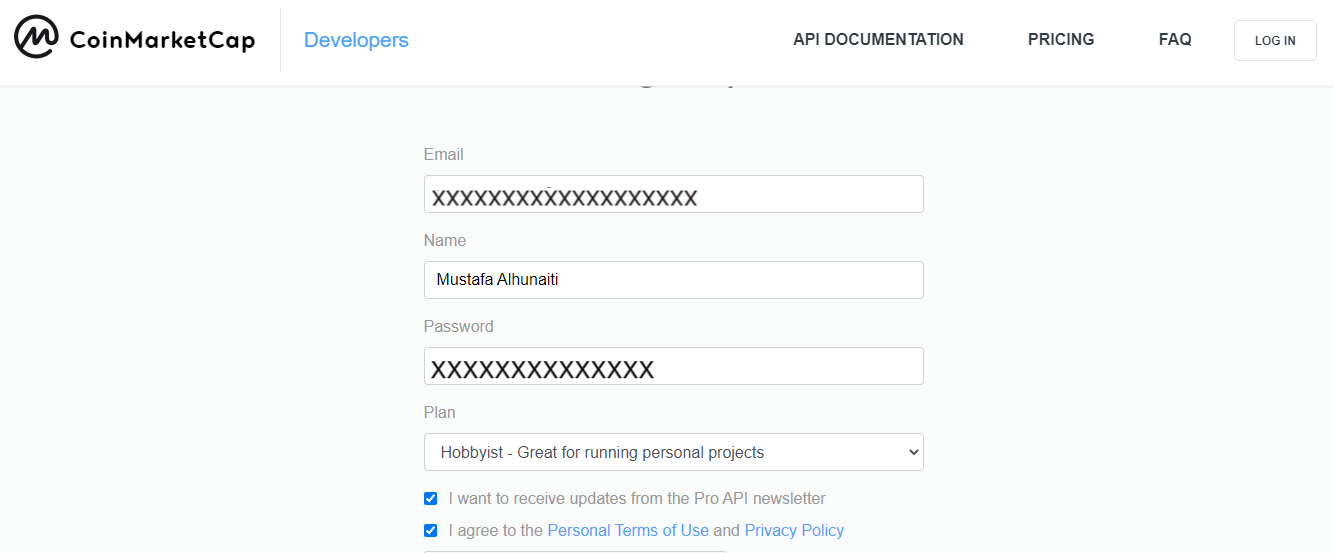

### After creating an account he will bring you here 
### Copy the Key via hover under the API key 
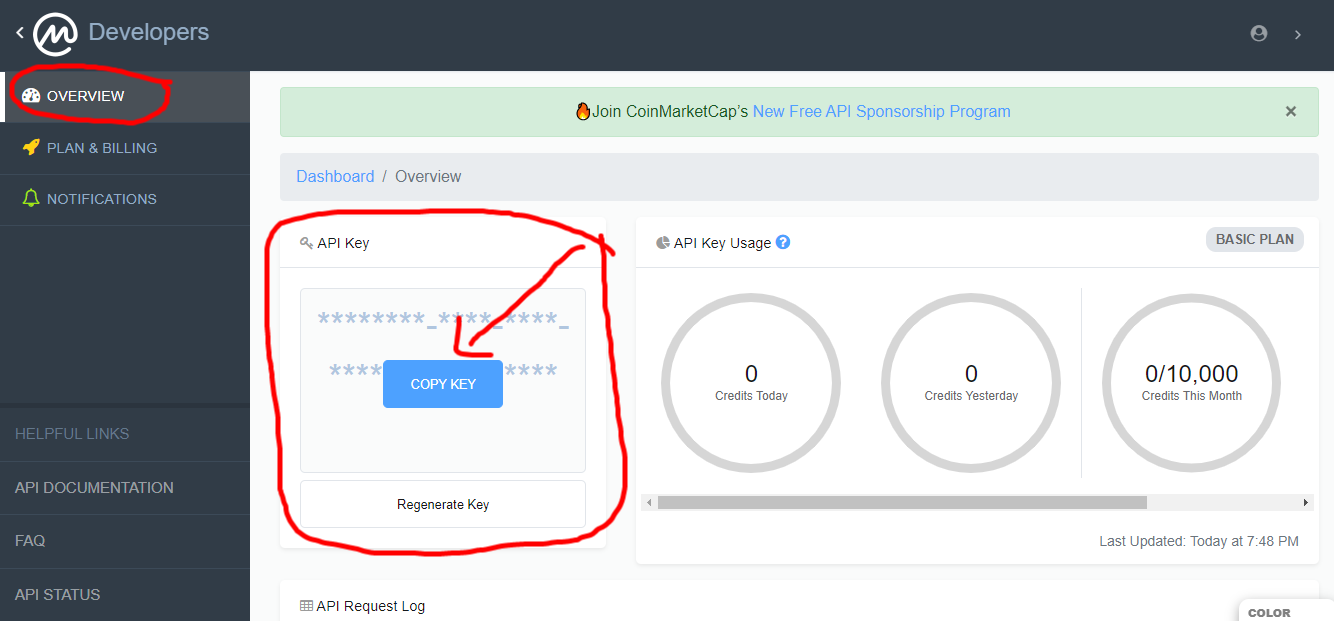

###  Before we continue, there is something really important to know which is the API documentation

### API documentation
#### one thing that you should always look for when you're using an API is the API documentation 

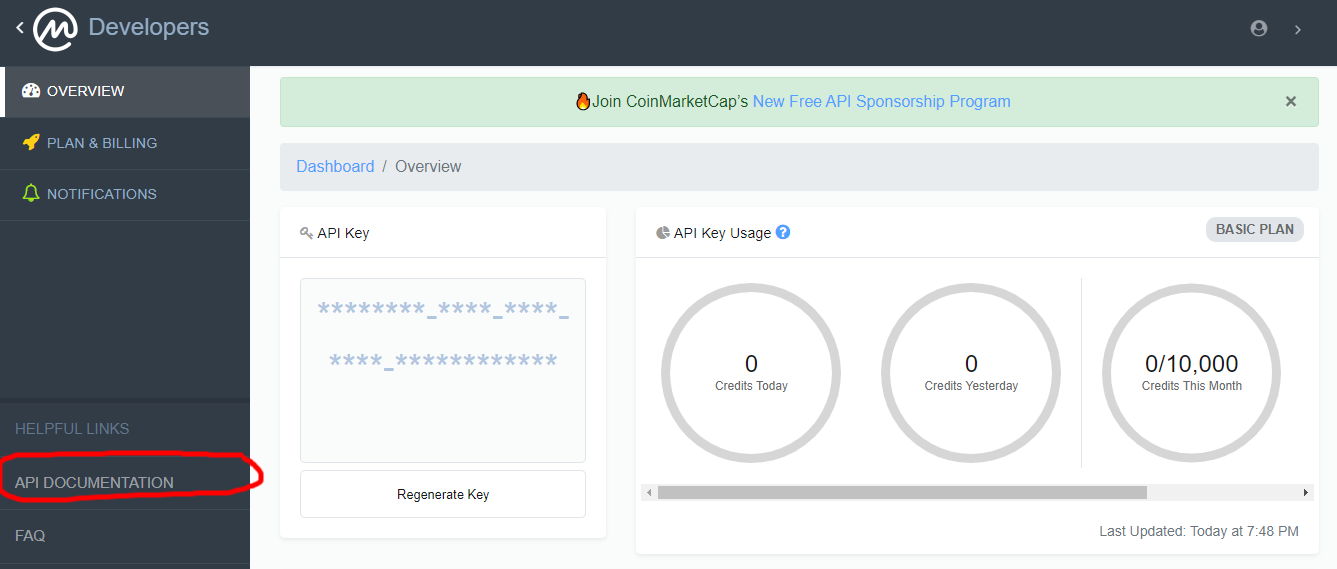

### Documentation for an API can be extremely important because not all APIs are set up exactly the same and so they're going to show you how to access it and how to use the keys it's really important that you read through this because they may have certain limitations or stipulations on how to use it  

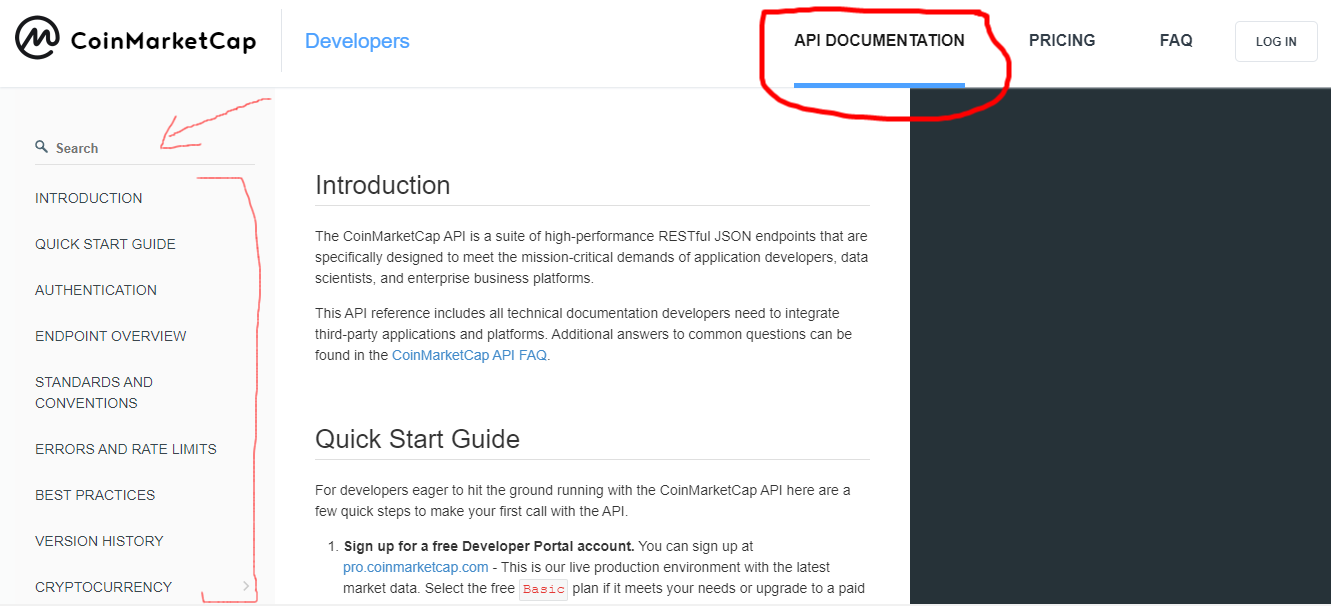

### I prefer to you read all the documentation.


### Copy the python code from  the documentation 👇 then put it on Jupyter Notebook
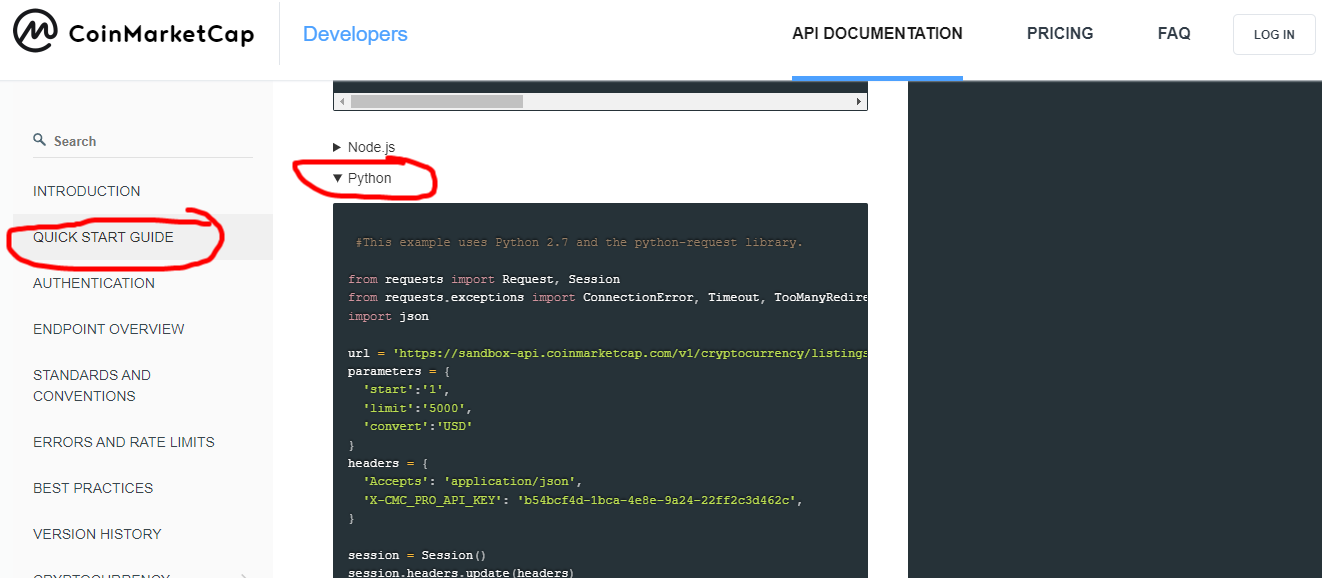

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # All requests should target domain https://pro-api.coinmarketcap.com
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '70c21e7a-d4cb-4e15-8618-9a47bdb71916', # here we will put our key between the Single Quotes 
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

{'status': {'timestamp': '2023-06-05T11:41:34.712Z', 'error_code': 0, 'error_message': None, 'elapsed': 63, 'credit_count': 25, 'notice': None, 'total_count': 10383}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10242, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

### You will get this Error when you try it for the first time 

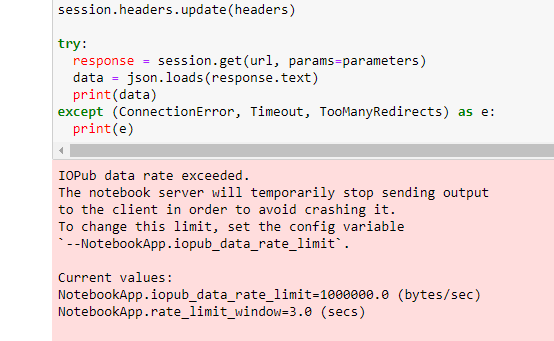

### i wanted to show you how to fix it

### what we need to do is actually increase the data rate limit 
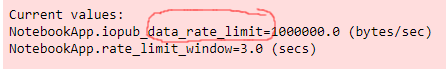

### so all we're going to do for that is we're going to search and we're going to say "anaconda prompt"
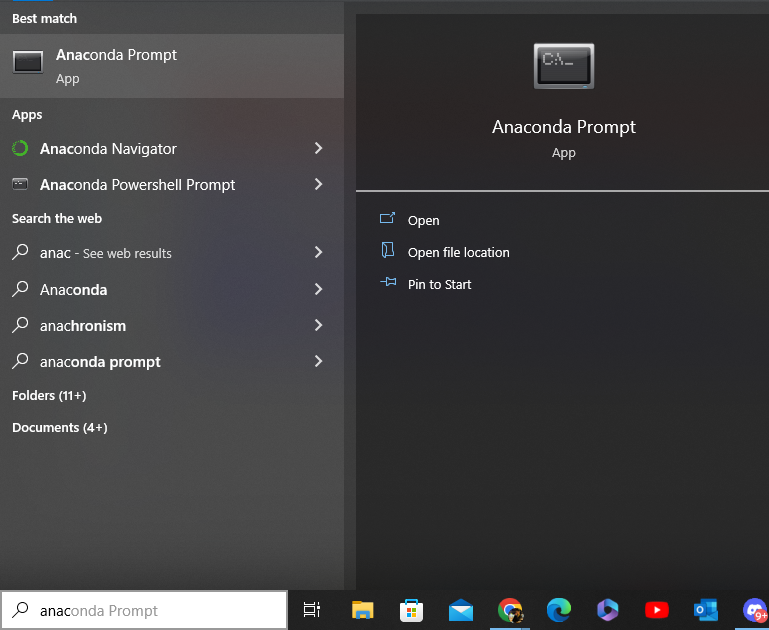

### we're going to increase the limit of the data that we can pull or increase our data rate limit 
#### put this in anaconda prompt  " jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000 " then press enter
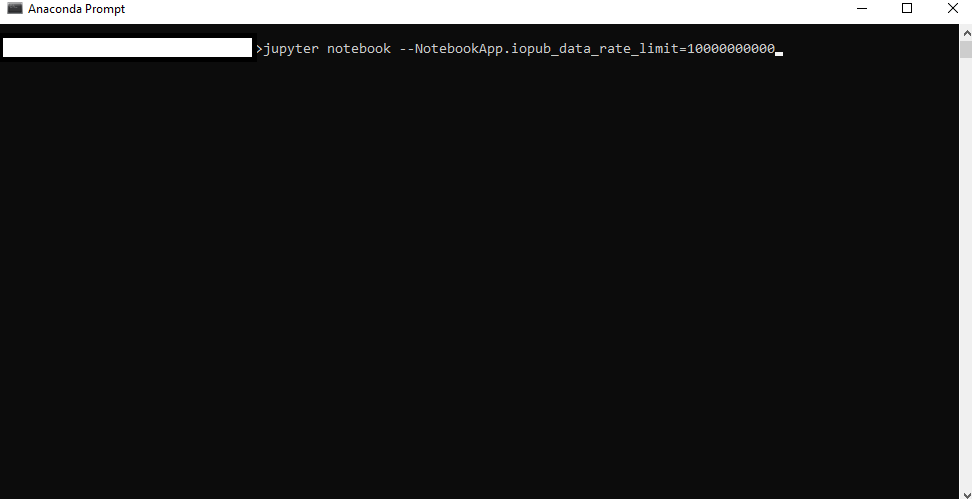

### Then copy this URL and put it on the browser
### the request will work after that  
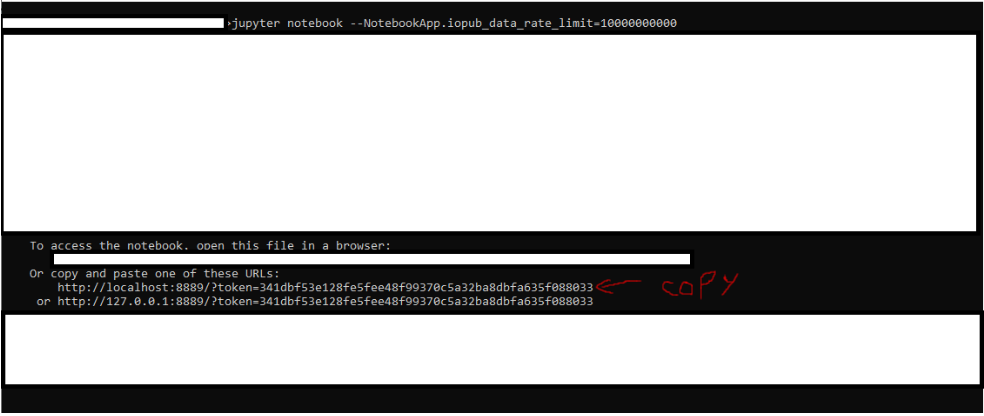

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # All requests should target domain https://pro-api.coinmarketcap.com
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '70c21e7a-d4cb-4e15-8618-9a47bdb71916', # here we will put our key between the Single Quotes 
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000"
# Into the Anaconda Prompt to change this to allow to pull data
# If that didn't work try using the local host URL

{'status': {'timestamp': '2023-06-05T11:41:36.033Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 10383}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10242, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

### This is actually in json format so use this json.loads.
### in order to get it kind of into usable state 
### json normalize  which is just going to make this look a lot prettier  basically we going to put it into data frame

In [3]:
type(data)

dict

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe
pd.json_normalize(data['status'])

timestamp  error_code error_message  elapsed  credit_count  \
0  2023-06-05T11:41:36.033Z           0          None       32             1   

  notice  total_count  
0   None        10383

In [6]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Hussam AlHunaiti\AppData\Local\Temp\ipykernel_464\3803338549.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


id         name symbol          slug  num_market_pairs  \
0      1      Bitcoin    BTC       bitcoin             10242   
1   1027     Ethereum    ETH      ethereum              6969   
2    825       Tether   USDT        tether             55043   
3   1839          BNB    BNB           bnb              1446   
4   3408     USD Coin   USDC      usd-coin             12825   
5     52          XRP    XRP           xrp               959   
6   2010      Cardano    ADA       cardano               824   
7     74     Dogecoin   DOGE      dogecoin               718   
8   5426       Solana    SOL        solana               468   
9   3890      Polygon  MATIC       polygon               729   
10  1958         TRON    TRX          tron               768   
11     2     Litecoin    LTC      litecoin               918   
12  6636     Polkadot    DOT  polkadot-new               507   
13  4687  Binance USD   BUSD   binance-usd              6865   
14  5805    Avalanche   AVAX     avalanche               443   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2018-10-08T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2017-10-01T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2020-04-10T00:00:00.000Z   
9   2019-04-28T00:00:00.000Z   
10  2017-09-13T00:00:00.000Z   
11  2013-04-28T00:00:00.000Z   
12  2020-08-19T00:00:00.000Z   
13  2019-09-20T00:00:00.000Z   
14  2020-07-13T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [payments, stablecoin, asset-backed-stablecoin...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
5   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
6   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
7   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
8   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
9   [pos, platform, enterprise-solutions, zero-kno...  1.000000e+10   
10                  [media, payments, tron-ecosystem]           NaN   
11        [mineable, pow, scrypt, medium-of-exchange]  8.400000e+07   
12  [substrate, polkadot, binance-chain, polkadot-...           NaN   
13  [stablecoin, asset-backed-stablecoin, binance-...           NaN   
14  [defi, smart-contracts, three-arrows-capital-p...  7.200000e+08   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.939341e+07  1.939341e+07            False       NaN         1   
1         1.202357e+08  1.202357e+08             True       NaN         2   
2         8.315249e+10  8.609064e+10             True       NaN         3   
3         1.558557e+08  1.558557e+08            False       NaN         4   
4         2.889191e+10  2.889191e+10            False       NaN         5   
5         5.198702e+10  9.998888e+10            False       NaN         6   
6         3.489399e+10  3.585859e+10            False       NaN         7   
7         1.396396e+11  1.396396e+11             True       NaN         8   
8         3.975986e+08  5.493898e+08             True       NaN         9   
9         9.279469e+09  1.000000e+10            False       NaN        10   
10        9.018173e+10  9.018176e+10             True       NaN        11   
11        7.307770e+07  8.400000e+07            False       NaN        12   
12        1.191241e+09  1.320720e+09             True       NaN        13   
13        5.149534e+09  5.149534e+09             True       NaN        14   
14        3.443399e+08  4.310594e+08            False       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_ratio  \
0                     

In [7]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # All requests should target domain https://pro-api.coinmarketcap.com
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '70c21e7a-d4cb-4e15-8618-9a47bdb71916', # here we will put our key between the Single Quotes 
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000"
# Into the Anaconda Prompt to change this to allow to pull data
# If that didn't work try using the local host URL

    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp('now')
    df
    
    if not os.path.isfile(r'C:\Users\Hussam AlHunaiti\Desktop\MustafaProjects\Python\How to Using a Public API with Python - Automating Crypto Website API Pull Using Python\API.csv'):
         df.to_csv(r'C:\Users\Hussam AlHunaiti\Desktop\MustafaProjects\Python\How to Using a Public API with Python - Automating Crypto Website API Pull Using Python\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Hussam AlHunaiti\Desktop\MustafaProjects\Python\How to Using a Public API with Python - Automating Crypto Website API Pull Using Python\API.csv', mode='a', header=False)
    
    
    
    

In [8]:
import os 
from time import time
from time import sleep

for i in range(5):
    api_runner()
    print('API Runner completed')
    sleep(5) #sleep for 1 minute
# exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


In [9]:
df72 = pd.read_csv(r'C:\Users\Hussam AlHunaiti\Desktop\MustafaProjects\Python\How to Using a Public API with Python - Automating Crypto Website API Pull Using Python\API.csv')
df72

Unnamed: 0    id         name symbol          slug  num_market_pairs  \
0             0     1      Bitcoin    BTC       bitcoin             10242   
1             1  1027     Ethereum    ETH      ethereum              6969   
2             2   825       Tether   USDT        tether             55036   
3             3  1839          BNB    BNB           bnb              1446   
4             4  3408     USD Coin   USDC      usd-coin             12823   
5             5    52          XRP    XRP           xrp               959   
6             6  2010      Cardano    ADA       cardano               824   
7             7    74     Dogecoin   DOGE      dogecoin               718   
8             8  5426       Solana    SOL        solana               468   
9             9  3890      Polygon  MATIC       polygon               729   
10           10  1958         TRON    TRX          tron               768   
11           11     2     Litecoin    LTC      litecoin               918   
12           12  6636     Polkadot    DOT  polkadot-new               507   
13           13  4687  Binance USD   BUSD   binance-usd              6865   
14           14  5805    Avalanche   AVAX     avalanche               443   
15            0     1      Bitcoin    BTC       bitcoin             10242   
16            1  1027     Ethereum    ETH      ethereum              6969   
17            2   825       Tether   USDT        tether             55036   
18            3  1839          BNB    BNB           bnb              1446   
19            4  3408     USD Coin   USDC      usd-coin             12823   
20            5    52          XRP    XRP           xrp               959   
21            6  2010      Cardano    ADA       cardano               824   
22            7    74     Dogecoin   DOGE      dogecoin               718   
23            8  5426       Solana    SOL        solana               468   
24            9  3890      Polygon  MATIC       polygon               729   
25           10  1958         TRON    TRX          tron               768   
26           11     2     Litecoin    LTC      litecoin               918   
27           12  6636     Polkadot    DOT  polkadot-new               507   
28           13  4687  Binance USD   BUSD   binance-usd              6865   
29           14  5805    Avalanche   AVAX     avalanche               443   
30            0     1      Bitcoin    BTC       bitcoin             10242   
31            1  1027     Ethereum    ETH      ethereum              6969   
32            2   825       Tether   USDT        tether             55036   
33            3  1839          BNB    BNB           bnb              1446   
34            4  3408     USD Coin   USDC      usd-coin             12823   
35            5    52          XRP    XRP           xrp               959   
36            6  2010      Cardano    ADA       cardano               824   
37            7    74     Dogecoin   DOGE      dogecoin               718   
38            8  5426       Solana    SOL        solana               468   
39            9  3890      Polygon  MATIC       polygon               729   
40           10  1958         TRON    TRX          tron               768   
41           11     2     Litecoin    LTC      litecoin               918   
42           12  6636     Polkadot    DOT  polkadot-new               507   
43           13  4687  Binance USD   BUSD   binance-usd              6865   
44           14  5805    Avalanche   AVAX     avalanche               443   
45            0     1      Bitcoin    BTC       bitcoin             10242   
46            1  1027     Ethereum    ETH      ethereum              6969   
47            2   825       Tether   USDT        tether             55036   
48            3  1839          BNB    BNB           bnb              1446   
49            4  3408     USD Coin   USDC      usd-coin             12823   
50            5    52          XRP    XRP           xrp               959   
5

In [10]:
df

id         name symbol          slug  num_market_pairs  \
0      1      Bitcoin    BTC       bitcoin             10242   
1   1027     Ethereum    ETH      ethereum              6969   
2    825       Tether   USDT        tether             55043   
3   1839          BNB    BNB           bnb              1446   
4   3408     USD Coin   USDC      usd-coin             12825   
5     52          XRP    XRP           xrp               959   
6   2010      Cardano    ADA       cardano               824   
7     74     Dogecoin   DOGE      dogecoin               718   
8   5426       Solana    SOL        solana               468   
9   3890      Polygon  MATIC       polygon               729   
10  1958         TRON    TRX          tron               768   
11     2     Litecoin    LTC      litecoin               918   
12  6636     Polkadot    DOT  polkadot-new               507   
13  4687  Binance USD   BUSD   binance-usd              6865   
14  5805    Avalanche   AVAX     avalanche               443   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2018-10-08T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2017-10-01T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2020-04-10T00:00:00.000Z   
9   2019-04-28T00:00:00.000Z   
10  2017-09-13T00:00:00.000Z   
11  2013-04-28T00:00:00.000Z   
12  2020-08-19T00:00:00.000Z   
13  2019-09-20T00:00:00.000Z   
14  2020-07-13T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [payments, stablecoin, asset-backed-stablecoin...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
5   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
6   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
7   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
8   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
9   [pos, platform, enterprise-solutions, zero-kno...  1.000000e+10   
10                  [media, payments, tron-ecosystem]           NaN   
11        [mineable, pow, scrypt, medium-of-exchange]  8.400000e+07   
12  [substrate, polkadot, binance-chain, polkadot-...           NaN   
13  [stablecoin, asset-backed-stablecoin, binance-...           NaN   
14  [defi, smart-contracts, three-arrows-capital-p...  7.200000e+08   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.939341e+07  1.939341e+07            False       NaN         1   
1         1.202357e+08  1.202357e+08             True       NaN         2   
2         8.315249e+10  8.609064e+10             True       NaN         3   
3         1.558557e+08  1.558557e+08            False       NaN         4   
4         2.889191e+10  2.889191e+10            False       NaN         5   
5         5.198702e+10  9.998888e+10            False       NaN         6   
6         3.489399e+10  3.585859e+10            False       NaN         7   
7         1.396396e+11  1.396396e+11             True       NaN         8   
8         3.975986e+08  5.493898e+08             True       NaN         9   
9         9.279469e+09  1.000000e+10            False       NaN        10   
10        9.018173e+10  9.018176e+10             True       NaN        11   
11        7.307770e+07  8.400000e+07            False       NaN        12   
12        1.191241e+09  1.320720e+09             True       NaN        13   
13        5.149534e+09  5.149534e+09             True       NaN        14   
14        3.443399e+08  4.310594e+08            False       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_ratio  \
0                     

In [11]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
df

id         name symbol          slug  num_market_pairs  \
0      1      Bitcoin    BTC       bitcoin             10242   
1   1027     Ethereum    ETH      ethereum              6969   
2    825       Tether   USDT        tether             55043   
3   1839          BNB    BNB           bnb              1446   
4   3408     USD Coin   USDC      usd-coin             12825   
5     52          XRP    XRP           xrp               959   
6   2010      Cardano    ADA       cardano               824   
7     74     Dogecoin   DOGE      dogecoin               718   
8   5426       Solana    SOL        solana               468   
9   3890      Polygon  MATIC       polygon               729   
10  1958         TRON    TRX          tron               768   
11     2     Litecoin    LTC      litecoin               918   
12  6636     Polkadot    DOT  polkadot-new               507   
13  4687  Binance USD   BUSD   binance-usd              6865   
14  5805    Avalanche   AVAX     avalanche               443   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2018-10-08T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2017-10-01T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2020-04-10T00:00:00.000Z   
9   2019-04-28T00:00:00.000Z   
10  2017-09-13T00:00:00.000Z   
11  2013-04-28T00:00:00.000Z   
12  2020-08-19T00:00:00.000Z   
13  2019-09-20T00:00:00.000Z   
14  2020-07-13T00:00:00.000Z   

                                                 tags         max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...     21000000.00000   
1   [pos, smart-contracts, ethereum-ecosystem, coi...                NaN   
2   [payments, stablecoin, asset-backed-stablecoin...                NaN   
3   [marketplace, centralized-exchange, payments, ...                NaN   
4   [medium-of-exchange, stablecoin, asset-backed-...                NaN   
5   [medium-of-exchange, enterprise-solutions, arr... 100000000000.00000   
6   [dpos, pos, platform, research, smart-contract...  45000000000.00000   
7   [mineable, pow, scrypt, medium-of-exchange, me...                NaN   
8   [pos, platform, solana-ecosystem, cms-holdings...                NaN   
9   [pos, platform, enterprise-solutions, zero-kno...  10000000000.00000   
10                  [media, payments, tron-ecosystem]                NaN   
11        [mineable, pow, scrypt, medium-of-exchange]     84000000.00000   
12  [substrate, polkadot, binance-chain, polkadot-...                NaN   
13  [stablecoin, asset-backed-stablecoin, binance-...                NaN   
14  [defi, smart-contracts, three-arrows-capital-p...    720000000.00000   

    circulating_supply       total_supply  infinite_supply  platform  \
0       19393412.00000     19393412.00000            False       NaN   
1      120235693.05722    120235693.05722             True       NaN   
2    83152494318.89395  86090638895.02290             True       NaN   
3      155855698.84222    155855698.84222            False       NaN   
4    28891905851.64861  28891905851.64861            False       NaN   
5    51987017573.00000  99988884267.00000            False       NaN   
6    34893987052.36100  35858591330.06100            False       NaN   
7   139639646383.70526 139639646383.70526             True       NaN   
8      397598634.00380    549389779.10425             True       NaN   
9     9279469069.28493  10000000000.00000            False       NaN   
10   90181730517.75482  90181755355.24138             True       NaN   
11      73077701.72744     84000000.00000            False       NaN   
12    1191241337.00247   1320720214.30765             True       NaN   
13    5149534148.55210   5149534148.55210             True       NaN   
14     344339920.21963    431059370.21963            False       NaN   

    cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0          1          

In [13]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                     
Bitcoin                          0.18884                      -1.59196   
Ethereum                         0.11206                      -1.81092   
Tether                          -0.01381                      -0.02832   
BNB                              0.12168                      -2.06018   
USD Coin                        -0.00935                       0.00100   
XRP                              0.26307                       1.71421   
Cardano                          0.08187                      -1.70978   
Dogecoin                         0.17630                      -1.41265   
Solana                           0.25951                      -0.06471   
Polygon                          0.12996                      -1.66163   
TRON                             0.06904                      -0.31656   
Litecoin                         0.09498                      -3.58653   
Polkadot                         0.32218                      -1.12158   
Binance USD                      0.02276                      -0.00652   
Avalanche                        0.21675                       0.66472   

             quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                     
Bitcoin                         -3.97651                      -8.53157   
Ethereum                        -1.74246                      -3.29684   
Tether                          -0.01596                      -0.11512   
BNB                             -4.15004                      -7.51267   
USD Coin                        -0.00117                      -0.00796   
XRP                             11.15431                      15.43177   
Cardano                         -1.54189                      -3.46804   
Dogecoin                        -1.87850                      -8.12412   
Solana                           4.47383                      -4.58370   
Polygon                         -4.43164                      -8.88285   
TRON                             5.00522                      15.56898   
Litecoin                         1.32858                       6.96416   
Polkadot                        -3.31810                      -8.46414   
Binance USD                     -0.02593                      -0.11746   
Avalanche                        1.06496                     -12.81866   

             quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                     
Bitcoin                          -4.08919                      19.58440  
Ethereum                          0.08286                      19.42576  
Tether                           -0.01771                       0.01307  
BNB                              -3.54204                       5.17051  
USD Coin                          0.01099                      -0.00072  
XRP                               7.07321                      43.92715  
Cardano                          -1.90390                      13.97930  
Dogecoin                        -19.46421                      -3.16436  
Solana                            4.79343                       5.90601  
Polygon                         -20.46442                     -22.49154  
TRON                             23.12572                      21.97799  
Litecoin                          2.26692                       7.71012  
Polkadot                        -15.91204                      -9.34661  
Binance USD                       0.02297                      -0.03534  
Avalanche                       -17.02341                      -8.79835

In [14]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.18884
             quote.USD.percent_change_24h    -1.59196
             quote.USD.percent_change_7d     -3.97651
             quote.USD.percent_change_30d    -8.53157
             quote.USD.percent_change_60d    -4.08919
             quote.USD.percent_change_90d    19.58440
Ethereum     quote.USD.percent_change_1h      0.11206
             quote.USD.percent_change_24h    -1.81092
             quote.USD.percent_change_7d     -1.74246
             quote.USD.percent_change_30d    -3.29684
             quote.USD.percent_change_60d     0.08286
             quote.USD.percent_change_90d    19.42576
Tether       quote.USD.percent_change_1h     -0.01381
             quote.USD.percent_change_24h    -0.02832
             quote.USD.percent_change_7d     -0.01596
             quote.USD.percent_change_30d    -0.11512
             quote.USD.percent_change_60d    -0.01771
             quote.USD.percent_change_90

In [15]:
display(type(df3))
display(type(df4))

pandas.core.frame.DataFrame

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.18884
            quote.USD.percent_change_24h  -1.59196
            quote.USD.percent_change_7d   -3.97651
            quote.USD.percent_change_30d  -8.53157
            quote.USD.percent_change_60d  -4.08919
            quote.USD.percent_change_90d  19.58440
Ethereum    quote.USD.percent_change_1h    0.11206
            quote.USD.percent_change_24h  -1.81092
            quote.USD.percent_change_7d   -1.74246
            quote.USD.percent_change_30d  -3.29684
            quote.USD.percent_change_60d   0.08286
            quote.USD.percent_change_90d  19.42576
Tether      quote.USD.percent_change_1h   -0.01381
            quote.USD.percent_change_24h  -0.02832
            quote.USD.percent_change_7d   -0.01596
            quote.USD.percent_change_30d  -0.11512
            quote.USD.percent_change_60d  -0.01771
            quote.USD.percent_change_90d   0.01307
BNB         quote.USD.percent_change_1h    0.12168
            quote.USD.percent_change_24h  -2.06018
            quote.USD.percent_change_7d   -4.15004
            quote.USD.percent_change_30d  -7.51267
            quote.USD.percent_change_60d  -3.54204
            quote.USD.percent_change_90d   5.17051
USD Coin    quote.USD.percent_change_1h   -0.00935
            quote.USD.percent_change_24h   0.00100
            quote.USD.percent_change_7d   -0.00117
            quote.USD.percent_change_30d  -0.00796
            quote.USD.percent_change_60d   0.01099
            quote.USD.percent_change_90d  -0.00072
XRP         quote.USD.percent_change_1h    0.26307
            quote.USD.percent_change_24h   1.71421
            quote.USD.percent_change_7d   11.15431
            quote.USD.percent_change_30d  15.43177
            quote.USD.percent_change_60d   7.07321
            quote.USD.percent_change_90d  43.92715
Cardano     quote.USD.percent_change_1h    0.08187
            quote.USD.percent_change_24h  -1.70978
            quote.USD.percent_change_7d   -1.54189
            quote.USD.percent_change_30d  -3.46804
            quote.USD.percent_change_60d  -1.90390
            quote.USD.percent_change_90d  13.97930
Dogecoin    quote.USD.percent_change_1h    0.17630
            quote.USD.percent_change_24h  -1.41265
            quote.USD.percent_change_7d   -1.87850
            quote.USD.percent_change_30d  -8.12412
            quote.USD.percent_change_60d -19.46421
            quote.USD.percent_change_90d  -3.16436
Solana      quote.USD.percent_change_1h    0.25951
            quote.USD.percent_change_24h  -0.06471
            quote.USD.percent_change_7d    4.47383
            quote.USD.percent_change_30d  -4.58370
            quote.USD.percent_change_60d   4.79343
            quote.USD.percent_change_90d   5.90601
Polygon     quote.USD.percent_change_1h    0.12996
            quote.USD.percent_change_24h  -1.66163
            quote.USD.percent_change_7d   -4.43164
            quote.USD.percent_change_30d  -8.88285
            quote.USD.percent_change_60d -20.46442
            quote.USD.percent_change_90d -22.49154
TRON        quote.USD.percent_change_1h    0.06904
            quote.USD.percent_change_24h  -0.31656
            quote.USD.percent_change_7d    5.00522
            quote.USD.percent_change_30d  15.56898
            quote.USD.percent_change_60d  23.12572
            quote.USD.percent_change_90d  21.97799
Litecoin    quote.USD.percent_change_1h    0.09498
            quote.USD.percent_change_24h  -3.58653
            quote.USD.percent_change_7d    1.32858
            quote.USD.percent_change_30d   6.96416
            quote.USD.percent_change_60d   2.26692
            quote.USD.percent_change_90d   7.71012
Polkadot    quote.USD.percent_change_1h    0.32218
            quote.USD.percent_change_24h  -1.12158
            quote.USD.percent_change_7d   -3.31810
            quote.USD.percent_change_30d  -8.46414
            quote.USD.percent_change_60d -15.91204
            quo

In [17]:
type(df5)

pandas.core.frame.DataFrame

In [18]:
df5.count()

values    90
dtype: int64

In [19]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function

df6 = df5.set_index(index)
display(df6)

# If it only has the index and values try doing reset_index like "df5.reset_index()"

df6 = df5.reset_index()
display(df6)






values
0    0.18884
1   -1.59196
2   -3.97651
3   -8.53157
4   -4.08919
5   19.58440
6    0.11206
7   -1.81092
8   -1.74246
9   -3.29684
10   0.08286
11  19.42576
12  -0.01381
13  -0.02832
14  -0.01596
15  -0.11512
16  -0.01771
17   0.01307
18   0.12168
19  -2.06018
20  -4.15004
21  -7.51267
22  -3.54204
23   5.17051
24  -0.00935
25   0.00100
26  -0.00117
27  -0.00796
28   0.01099
29  -0.00072
30   0.26307
31   1.71421
32  11.15431
33  15.43177
34   7.07321
35  43.92715
36   0.08187
37  -1.70978
38  -1.54189
39  -3.46804
40  -1.90390
41  13.97930
42   0.17630
43  -1.41265
44  -1.87850
45  -8.12412
46 -19.46421
47  -3.16436
48   0.25951
49  -0.06471
50   4.47383
51  -4.58370
52   4.79343
53   5.90601
54   0.12996
55  -1.66163
56  -4.43164
57  -8.88285
58 -20.46442
59 -22.49154
60   0.06904
61  -0.31656
62   5.00522
63  15.56898
64  23.12572
65  21.97799
66   0.09498
67  -3.58653
68   1.32858
69   6.96416
70   2.26692
71   7.71012
72   0.32218
73  -1.12158
74  -3.31810
75  -8.46414
76 -15.91204
77  -9.34661
78   0.02276
79  -0.00652
80  -0.02593
81  -0.11746
82   0.02297
83  -0.03534
84   0.21675
85   0.66472
86   1.06496
87 -12.81866
88 -17.02341
89  -8.79835

name                       level_1    values
0       Bitcoin   quote.USD.percent_change_1h   0.18884
1       Bitcoin  quote.USD.percent_change_24h  -1.59196
2       Bitcoin   quote.USD.percent_change_7d  -3.97651
3       Bitcoin  quote.USD.percent_change_30d  -8.53157
4       Bitcoin  quote.USD.percent_change_60d  -4.08919
5       Bitcoin  quote.USD.percent_change_90d  19.58440
6      Ethereum   quote.USD.percent_change_1h   0.11206
7      Ethereum  quote.USD.percent_change_24h  -1.81092
8      Ethereum   quote.USD.percent_change_7d  -1.74246
9      Ethereum  quote.USD.percent_change_30d  -3.29684
10     Ethereum  quote.USD.percent_change_60d   0.08286
11     Ethereum  quote.USD.percent_change_90d  19.42576
12       Tether   quote.USD.percent_change_1h  -0.01381
13       Tether  quote.USD.percent_change_24h  -0.02832
14       Tether   quote.USD.percent_change_7d  -0.01596
15       Tether  quote.USD.percent_change_30d  -0.11512
16       Tether  quote.USD.percent_change_60d  -0.01771
17       Tether  quote.USD.percent_change_90d   0.01307
18          BNB   quote.USD.percent_change_1h   0.12168
19          BNB  quote.USD.percent_change_24h  -2.06018
20          BNB   quote.USD.percent_change_7d  -4.15004
21          BNB  quote.USD.percent_change_30d  -7.51267
22          BNB  quote.USD.percent_change_60d  -3.54204
23          BNB  quote.USD.percent_change_90d   5.17051
24     USD Coin   quote.USD.percent_change_1h  -0.00935
25     USD Coin  quote.USD.percent_change_24h   0.00100
26     USD Coin   quote.USD.percent_change_7d  -0.00117
27     USD Coin  quote.USD.percent_change_30d  -0.00796
28     USD Coin  quote.USD.percent_change_60d   0.01099
29     USD Coin  quote.USD.percent_change_90d  -0.00072
30          XRP   quote.USD.percent_change_1h   0.26307
31          XRP  quote.USD.percent_change_24h   1.71421
32          XRP   quote.USD.percent_change_7d  11.15431
33          XRP  quote.USD.percent_change_30d  15.43177
34          XRP  quote.USD.percent_change_60d   7.07321
35          XRP  quote.USD.percent_change_90d  43.92715
36      Cardano   quote.USD.percent_change_1h   0.08187
37      Cardano  quote.USD.percent_change_24h  -1.70978
38      Cardano   quote.USD.percent_change_7d  -1.54189
39      Cardano  quote.USD.percent_change_30d  -3.46804
40      Cardano  quote.USD.percent_change_60d  -1.90390
41      Cardano  quote.USD.percent_change_90d  13.97930
42     Dogecoin   quote.USD.percent_change_1h   0.17630
43     Dogecoin  quote.USD.percent_change_24h  -1.41265
44     Dogecoin   quote.USD.percent_change_7d  -1.87850
45     Dogecoin  quote.USD.percent_change_30d  -8.12412
46     Dogecoin  quote.USD.percent_change_60d -19.46421
47     Dogecoin  quote.USD.percent_change_90d  -3.16436
48       Solana   quote.USD.percent_change_1h   0.25951
49       Solana  quote.USD.percent_change_24h  -0.06471
50       Solana   quote.USD.percent_change_7d   4.47383
51       Solana  quote.USD.percent_change_30d  -4.58370
52       Solana  quote.USD.percent_change_60d   4.79343
53       Solana  quote.USD.percent_change_90d   5.90601
54      Polygon   quote.USD.percent_change_1h   0.12996
55      Polygon  quote.USD.percent_change_24h  -1.66163
56      Polygon   quote.USD.percent_change_7d  -4.43164
57      Polygon  quote.USD.percent_change_30d  -8.88285
58      Polygon  quote.USD.percent_change_60d -20.46442
59      Polygon  quote.USD.percent_change_90d -22.49154
60         TRON   quote.USD.percent_change_1h   0.06904
61         TRON  quote.USD.percent_change_24h  -0.31656
62         TRON   quote.USD.percent_change_7d   5.00522
63         TRON  quote.USD.percent_change_30d  15.56898
64         TRON  quote.USD.percent_change_60d  23.12572
65         TRON  quote.USD.percent_change_90d  21.97799
66     Litecoin   quote.USD.percent_change_1h   0.09498
67     Litecoin  quote.USD.percent_change_24h  -3.58653
68     Litecoin   quote.USD.percent_change_7d   1.32858
69     Litecoin  quote.USD.percent_change_30d   6.96416
70     Litecoin  quote.USD.percent_

In [20]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

name                percent_change    values
0       Bitcoin   quote.USD.percent_change_1h   0.18884
1       Bitcoin  quote.USD.percent_change_24h  -1.59196
2       Bitcoin   quote.USD.percent_change_7d  -3.97651
3       Bitcoin  quote.USD.percent_change_30d  -8.53157
4       Bitcoin  quote.USD.percent_change_60d  -4.08919
5       Bitcoin  quote.USD.percent_change_90d  19.58440
6      Ethereum   quote.USD.percent_change_1h   0.11206
7      Ethereum  quote.USD.percent_change_24h  -1.81092
8      Ethereum   quote.USD.percent_change_7d  -1.74246
9      Ethereum  quote.USD.percent_change_30d  -3.29684
10     Ethereum  quote.USD.percent_change_60d   0.08286
11     Ethereum  quote.USD.percent_change_90d  19.42576
12       Tether   quote.USD.percent_change_1h  -0.01381
13       Tether  quote.USD.percent_change_24h  -0.02832
14       Tether   quote.USD.percent_change_7d  -0.01596
15       Tether  quote.USD.percent_change_30d  -0.11512
16       Tether  quote.USD.percent_change_60d  -0.01771
17       Tether  quote.USD.percent_change_90d   0.01307
18          BNB   quote.USD.percent_change_1h   0.12168
19          BNB  quote.USD.percent_change_24h  -2.06018
20          BNB   quote.USD.percent_change_7d  -4.15004
21          BNB  quote.USD.percent_change_30d  -7.51267
22          BNB  quote.USD.percent_change_60d  -3.54204
23          BNB  quote.USD.percent_change_90d   5.17051
24     USD Coin   quote.USD.percent_change_1h  -0.00935
25     USD Coin  quote.USD.percent_change_24h   0.00100
26     USD Coin   quote.USD.percent_change_7d  -0.00117
27     USD Coin  quote.USD.percent_change_30d  -0.00796
28     USD Coin  quote.USD.percent_change_60d   0.01099
29     USD Coin  quote.USD.percent_change_90d  -0.00072
30          XRP   quote.USD.percent_change_1h   0.26307
31          XRP  quote.USD.percent_change_24h   1.71421
32          XRP   quote.USD.percent_change_7d  11.15431
33          XRP  quote.USD.percent_change_30d  15.43177
34          XRP  quote.USD.percent_change_60d   7.07321
35          XRP  quote.USD.percent_change_90d  43.92715
36      Cardano   quote.USD.percent_change_1h   0.08187
37      Cardano  quote.USD.percent_change_24h  -1.70978
38      Cardano   quote.USD.percent_change_7d  -1.54189
39      Cardano  quote.USD.percent_change_30d  -3.46804
40      Cardano  quote.USD.percent_change_60d  -1.90390
41      Cardano  quote.USD.percent_change_90d  13.97930
42     Dogecoin   quote.USD.percent_change_1h   0.17630
43     Dogecoin  quote.USD.percent_change_24h  -1.41265
44     Dogecoin   quote.USD.percent_change_7d  -1.87850
45     Dogecoin  quote.USD.percent_change_30d  -8.12412
46     Dogecoin  quote.USD.percent_change_60d -19.46421
47     Dogecoin  quote.USD.percent_change_90d  -3.16436
48       Solana   quote.USD.percent_change_1h   0.25951
49       Solana  quote.USD.percent_change_24h  -0.06471
50       Solana   quote.USD.percent_change_7d   4.47383
51       Solana  quote.USD.percent_change_30d  -4.58370
52       Solana  quote.USD.percent_change_60d   4.79343
53       Solana  quote.USD.percent_change_90d   5.90601
54      Polygon   quote.USD.percent_change_1h   0.12996
55      Polygon  quote.USD.percent_change_24h  -1.66163
56      Polygon   quote.USD.percent_change_7d  -4.43164
57      Polygon  quote.USD.percent_change_30d  -8.88285
58      Polygon  quote.USD.percent_change_60d -20.46442
59      Polygon  quote.USD.percent_change_90d -22.49154
60         TRON   quote.USD.percent_change_1h   0.06904
61         TRON  quote.USD.percent_change_24h  -0.31656
62         TRON   quote.USD.percent_change_7d   5.00522
63         TRON  quote.USD.percent_change_30d  15.56898
64         TRON  quote.USD.percent_change_60d  23.12572
65         TRON  quote.USD.percent_change_90d  21.97799
66     Litecoin   quote.USD.percent_change_1h   0.09498
67     Litecoin  quote.USD.percent_change_24h  -3.58653
68     Litecoin   quote.USD.percent_change_7d   1.32858
69     Litecoin  quote.USD.percent_change_30d   6.96416
70     Litecoin  quote.USD.percent_

In [21]:
import seaborn as sns
import matplotlib as plt 

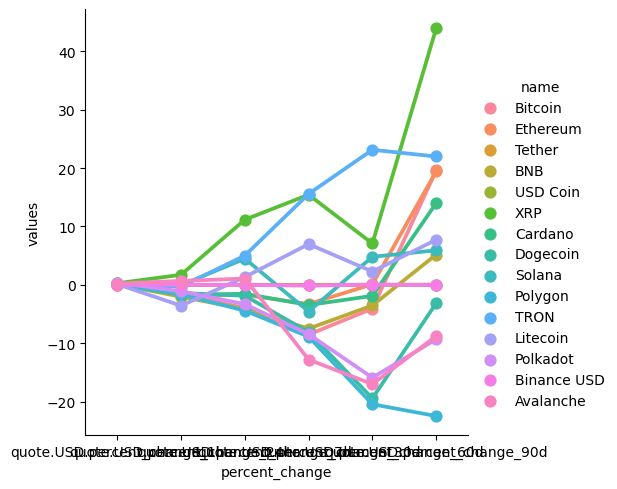

In [22]:
sns.catplot(x='percent_change',y='values',hue = 'name', data = df7, kind = 'point')# hue = legend

In [23]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

name percent_change    values
0       Bitcoin             1h   0.18884
1       Bitcoin            24h  -1.59196
2       Bitcoin             7d  -3.97651
3       Bitcoin            30d  -8.53157
4       Bitcoin            60d  -4.08919
5       Bitcoin            90d  19.58440
6      Ethereum             1h   0.11206
7      Ethereum            24h  -1.81092
8      Ethereum             7d  -1.74246
9      Ethereum            30d  -3.29684
10     Ethereum            60d   0.08286
11     Ethereum            90d  19.42576
12       Tether             1h  -0.01381
13       Tether            24h  -0.02832
14       Tether             7d  -0.01596
15       Tether            30d  -0.11512
16       Tether            60d  -0.01771
17       Tether            90d   0.01307
18          BNB             1h   0.12168
19          BNB            24h  -2.06018
20          BNB             7d  -4.15004
21          BNB            30d  -7.51267
22          BNB            60d  -3.54204
23          BNB            90d   5.17051
24     USD Coin             1h  -0.00935
25     USD Coin            24h   0.00100
26     USD Coin             7d  -0.00117
27     USD Coin            30d  -0.00796
28     USD Coin            60d   0.01099
29     USD Coin            90d  -0.00072
30          XRP             1h   0.26307
31          XRP            24h   1.71421
32          XRP             7d  11.15431
33          XRP            30d  15.43177
34          XRP            60d   7.07321
35          XRP            90d  43.92715
36      Cardano             1h   0.08187
37      Cardano            24h  -1.70978
38      Cardano             7d  -1.54189
39      Cardano            30d  -3.46804
40      Cardano            60d  -1.90390
41      Cardano            90d  13.97930
42     Dogecoin             1h   0.17630
43     Dogecoin            24h  -1.41265
44     Dogecoin             7d  -1.87850
45     Dogecoin            30d  -8.12412
46     Dogecoin            60d -19.46421
47     Dogecoin            90d  -3.16436
48       Solana             1h   0.25951
49       Solana            24h  -0.06471
50       Solana             7d   4.47383
51       Solana            30d  -4.58370
52       Solana            60d   4.79343
53       Solana            90d   5.90601
54      Polygon             1h   0.12996
55      Polygon            24h  -1.66163
56      Polygon             7d  -4.43164
57      Polygon            30d  -8.88285
58      Polygon            60d -20.46442
59      Polygon            90d -22.49154
60         TRON             1h   0.06904
61         TRON            24h  -0.31656
62         TRON             7d   5.00522
63         TRON            30d  15.56898
64         TRON            60d  23.12572
65         TRON            90d  21.97799
66     Litecoin             1h   0.09498
67     Litecoin            24h  -3.58653
68     Litecoin             7d   1.32858
69     Litecoin            30d   6.96416
70     Litecoin            60d   2.26692
71     Litecoin            90d   7.71012
72     Polkadot             1h   0.32218
73     Polkadot            24h  -1.12158
74     Polkadot             7d  -3.31810
75     Polkadot            30d  -8.46414
76     Polkadot            60d -15.91204
77     Polkadot            90d  -9.34661
78  Binance USD             1h   0.02276
79  Binance USD            24h  -0.00652
80  Binance USD             7d  -0.02593
81  Binance USD            30d  -0.11746
82  Binance USD            60d   0.02297
83  Binance USD            90d  -0.03534
84    Avalanche             1h   0.21675
85    Avalanche            24h   0.66472
86    Avalanche             7d   1.06496
87    Avalanche            30d -12.81866
88    Avalanche            60d -17.02341
89    Avalanche            90d  -8.79835

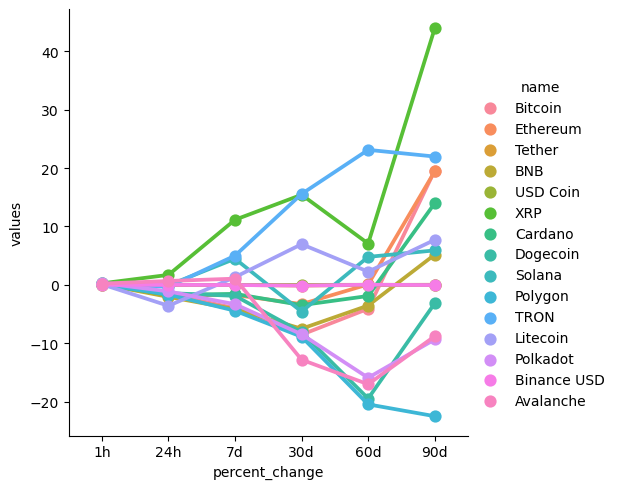

In [24]:
sns.catplot(x='percent_change',y='values',hue = 'name', data = df7, kind = 'point')

In [27]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df72[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

name  quote.USD.price                   timestamp
0    Bitcoin      26782.23508  2023-06-05 13:07:15.546775
15   Bitcoin      26786.49864  2023-06-05 13:08:15.975535
30   Bitcoin      26787.84074  2023-06-05 13:09:19.486641
45   Bitcoin      26784.39859  2023-06-05 13:10:19.965128
60   Bitcoin      26785.52171  2023-06-05 13:11:20.630480
75   Bitcoin      26759.88727  2023-06-05 14:28:49.257942
90   Bitcoin      26762.73872  2023-06-05 14:30:01.577796
105  Bitcoin      26778.38995  2023-06-05 14:31:02.101004
120  Bitcoin      26786.24165  2023-06-05 14:32:02.587541
135  Bitcoin      26779.05186  2023-06-05 14:33:03.219755
150  Bitcoin      26785.92747  2023-06-05 14:34:03.866664
165  Bitcoin      26767.29013  2023-06-05 14:35:37.171188
180  Bitcoin      26767.88781  2023-06-05 14:36:36.634281
195  Bitcoin      26767.88781  2023-06-05 14:36:41.947464
210  Bitcoin      26767.88781  2023-06-05 14:36:47.448279
225  Bitcoin      26767.88781  2023-06-05 14:36:52.762913
240  Bitcoin      26767.88781  2023-06-05 14:36:59.485446
255  Bitcoin      26767.88781  2023-06-05 14:37:26.980045
270  Bitcoin      26767.88781  2023-06-05 14:37:32.478979
285  Bitcoin      26765.11862  2023-06-05 14:37:40.456603
300  Bitcoin      26765.11862  2023-06-05 14:37:45.780525
315  Bitcoin      26765.11862  2023-06-05 14:37:51.368260
330  Bitcoin      26771.80362  2023-06-05 14:38:54.351413
345  Bitcoin      26771.80362  2023-06-05 14:38:59.989605
360  Bitcoin      26771.80362  2023-06-05 14:39:05.637527
375  Bitcoin      26771.80362  2023-06-05 14:39:10.960441
390  Bitcoin      26771.80362  2023-06-05 14:39:16.460526
405  Bitcoin      26789.37398  2023-06-05 14:41:36.877147
420  Bitcoin      26789.37398  2023-06-05 14:41:42.389483
435  Bitcoin      26789.37398  2023-06-05 14:41:47.910236
450  Bitcoin      26789.37398  2023-06-05 14:41:53.438336
465  Bitcoin      26789.37398  2023-06-05 14:41:58.961234

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

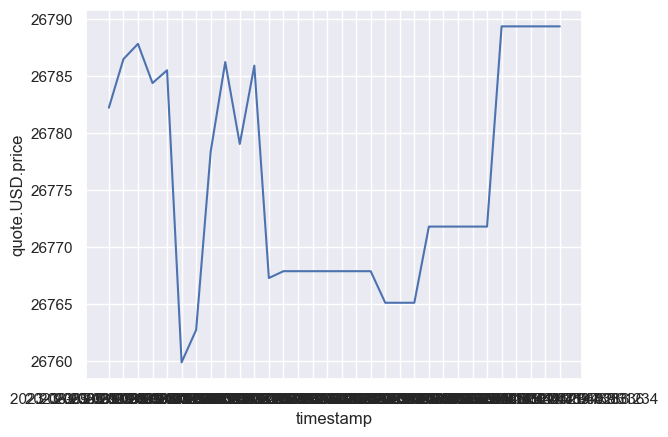

In [28]:
sns.set_theme(style="darkgrid")


sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

In [29]:
df10['timestamp'] = df10['timestamp'].replace(['2023-06-05 13:07:15.546775','2023-06-05 13:08:15.975535','2023-06-05 13:09:19.486641','2023-06-05 13:10:19.965128','2023-06-05 13:11:20.630480','2023-06-05 14:28:49.257942'],['13:07:15.54','13:08:15.97','13:09:19.48','13:10:19.96','13:11:20.63','14:28:49.25'])
df10

name  quote.USD.price                   timestamp
0    Bitcoin      26782.23508                 13:07:15.54
15   Bitcoin      26786.49864                 13:08:15.97
30   Bitcoin      26787.84074                 13:09:19.48
45   Bitcoin      26784.39859                 13:10:19.96
60   Bitcoin      26785.52171                 13:11:20.63
75   Bitcoin      26759.88727                 14:28:49.25
90   Bitcoin      26762.73872  2023-06-05 14:30:01.577796
105  Bitcoin      26778.38995  2023-06-05 14:31:02.101004
120  Bitcoin      26786.24165  2023-06-05 14:32:02.587541
135  Bitcoin      26779.05186  2023-06-05 14:33:03.219755
150  Bitcoin      26785.92747  2023-06-05 14:34:03.866664
165  Bitcoin      26767.29013  2023-06-05 14:35:37.171188
180  Bitcoin      26767.88781  2023-06-05 14:36:36.634281
195  Bitcoin      26767.88781  2023-06-05 14:36:41.947464
210  Bitcoin      26767.88781  2023-06-05 14:36:47.448279
225  Bitcoin      26767.88781  2023-06-05 14:36:52.762913
240  Bitcoin      26767.88781  2023-06-05 14:36:59.485446
255  Bitcoin      26767.88781  2023-06-05 14:37:26.980045
270  Bitcoin      26767.88781  2023-06-05 14:37:32.478979
285  Bitcoin      26765.11862  2023-06-05 14:37:40.456603
300  Bitcoin      26765.11862  2023-06-05 14:37:45.780525
315  Bitcoin      26765.11862  2023-06-05 14:37:51.368260
330  Bitcoin      26771.80362  2023-06-05 14:38:54.351413
345  Bitcoin      26771.80362  2023-06-05 14:38:59.989605
360  Bitcoin      26771.80362  2023-06-05 14:39:05.637527
375  Bitcoin      26771.80362  2023-06-05 14:39:10.960441
390  Bitcoin      26771.80362  2023-06-05 14:39:16.460526
405  Bitcoin      26789.37398  2023-06-05 14:41:36.877147
420  Bitcoin      26789.37398  2023-06-05 14:41:42.389483
435  Bitcoin      26789.37398  2023-06-05 14:41:47.910236
450  Bitcoin      26789.37398  2023-06-05 14:41:53.438336
465  Bitcoin      26789.37398  2023-06-05 14:41:58.961234

In [34]:
df11= df10.head(6)
df11

name  quote.USD.price    timestamp
0   Bitcoin      26782.23508  13:07:15.54
15  Bitcoin      26786.49864  13:08:15.97
30  Bitcoin      26787.84074  13:09:19.48
45  Bitcoin      26784.39859  13:10:19.96
60  Bitcoin      26785.52171  13:11:20.63
75  Bitcoin      26759.88727  14:28:49.25

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

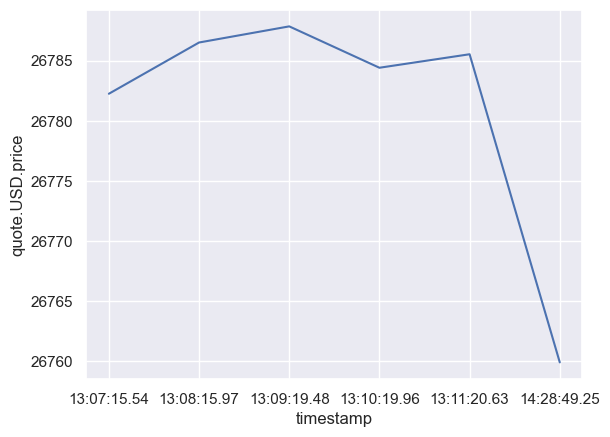

In [35]:
sns.set_theme(style="darkgrid")


sns.lineplot(x='timestamp', y='quote.USD.price', data = df11)